In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [65]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [66]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [67]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

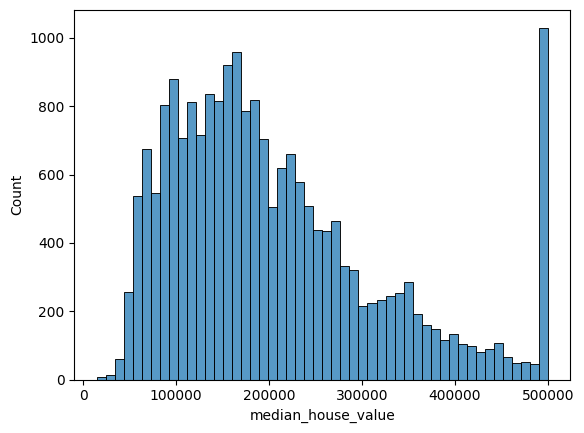

In [69]:
sns.histplot(df.median_house_value, bins=50)

In [70]:
df.median_house_value.sort_values()[:-10]

9188      14999.0
19802     14999.0
2799      14999.0
2521      14999.0
5887      17500.0
           ...   
17493    500001.0
16946    500001.0
8268     500001.0
17494    500001.0
8189     500001.0
Name: median_house_value, Length: 20630, dtype: float64

In [145]:
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
    ]
df = pd.read_csv('housing.csv')
df = df[df.ocean_proximity.isin(['<1H OCEAN','INLAND'])][columns]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

In [146]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

In [147]:
df.population.median()

1195.0

## Question 3

In [148]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [149]:
np.random.seed(42)
indexes = np.arange(n)
np.random.shuffle(indexes)
indexes

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [150]:
df.median_house_value = np.log1p(df.median_house_value)

/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

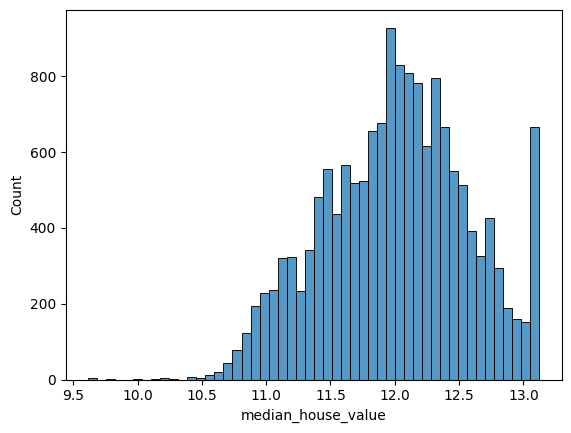

In [151]:
sns.histplot(df.median_house_value, bins=50)

In [152]:
df_train = df.iloc[indexes[:n_train]].reset_index(drop=True)
df_val = df.iloc[indexes[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[indexes[n_train+n_val:]].reset_index(drop=True)

In [153]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [154]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [155]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [156]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
    ]
def prepare_X(df, fill_na_value=0):
    df = df.copy()
        
    df_num = df[features]
    df_num = df_num.fillna(fill_na_value)
    X = df_num.values

    return X

In [157]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [158]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### Filling with zero

In [159]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

w0, w = train_linear_regression_reg(X_train, y_train)
y_pred = w0 + X_val.dot(w)

In [160]:
round(rmse(y_pred, y_val),2)

0.34

### Filling with mean

In [161]:
total_bedrooms_mean = df_train.total_bedrooms.mean()
total_bedrooms_mean

542.552956325786

In [162]:
X_train = prepare_X(df_train, fill_na_value=total_bedrooms_mean)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val, fill_na_value=total_bedrooms_mean)
y_pred = w0 + X_val.dot(w)

In [163]:
round(rmse(y_pred, y_val),2)

0.34

/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/k.shilovskiy/Development/ReplyProje

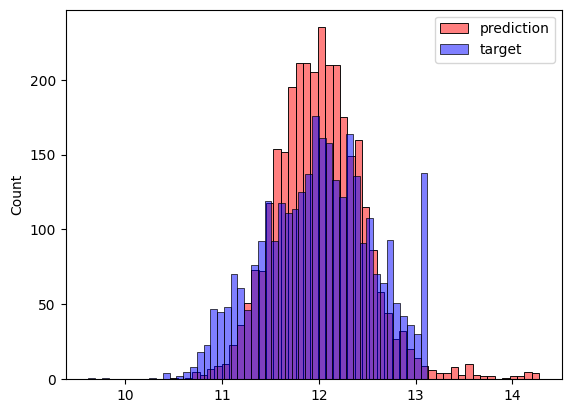

In [164]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Question 4

In [165]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_train = prepare_X(df_train, fill_na_value=total_bedrooms_mean)
X_val = prepare_X(df_val, fill_na_value=total_bedrooms_mean)

for v in r_values:    
    w0, w = train_linear_regression_reg(X_train, y_train, r=v)
    y_pred = w0 + X_val.dot(w)
    print(f"Testing r={v}")
    print(round(rmse(y_pred, y_val),2))

Testing r=0
0.34
Testing r=1e-06
0.34
Testing r=0.0001
0.34
Testing r=0.001
0.34
Testing r=0.01
0.34
Testing r=0.1
0.34
Testing r=1
0.34
Testing r=5
0.35
Testing r=10
0.35


## Question 5

In [175]:
def split_df(seed, df):
    df = df.copy()
    np.random.seed(seed)
    indexes = np.arange(n)
    np.random.shuffle(indexes)

    df_train = df.iloc[indexes[:n_train]].reset_index(drop=True)
    df_val = df.iloc[indexes[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[indexes[n_train+n_val:]].reset_index(drop=True)
    
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return (df_train, y_train),(df_val, y_val), (df_test, y_test)

In [181]:
df = pd.read_csv('housing.csv')
df = df[df.ocean_proximity.isin(['<1H OCEAN','INLAND'])][columns]
df.median_house_value = np.log1p(df.median_house_value)
df


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,12.973866
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,12.287657
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,12.419574
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,12.554971
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,12.287196
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883


In [196]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores = []
for seed in seeds:
    train_set, validation_set, _ = split_df(seed, df)
    
    df_train , y_train = train_set
    df_val, y_val = validation_set
    
    X_train = prepare_X(df_train, fill_na_value=0)
    X_val = prepare_X(df_val, fill_na_value=0)
    
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_pred, y_val)
    scores.append(score)


std = np.std(scores)
print(f"Standard deviation = {round(std, 3)}")

Standard deviation = 0.005


## Question 6

In [197]:
train_set, validation_set, test_set = split_df(seed=9, df=df)

df_train , y_train = train_set
df_val, y_val = validation_set
df_test, y_test = test_set

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])


X_train = prepare_X(df_full_train, fill_na_value=0)
X_test = prepare_X(df_test, fill_na_value=0)

w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)

test_score = rmse(y_pred, y_test)
print(f"Test RMSE = {round(test_score, 2)}")

Test RMSE = 0.33
